# Joe Biden Stock Portfolio

https://en.wikipedia.org/wiki/Joe_Biden

https://money.usnews.com/investing/stock-market-news/slideshows/tech-stocks-to-buy-under-a-biden-presidency?slide=4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'GOOGL','EXPE','VRM','TWTR', 'AMZN','PTON','SNAP','PINS']
start = '2021-01-20'
end = '2022-03-25'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  9 of 9 completed


,AMZN,EXPE,GOOGL,PINS,PTON,SNAP,SPY,TWTR,VRM
Date,,,,,,,,,
2021-01-20,3263.379883,141.750000,1880.069946,72.639999,155.789993,52.200001,377.666870,47.599998,36.580002
2021-01-21,3306.989990,138.880005,1884.150024,73.519997,158.130005,54.400002,378.011169,47.119999,36.740002
2021-01-22,3292.229980,136.520004,1892.560059,73.080002,159.750000,53.570000,376.673218,48.060001,36.549999
2021-01-25,3294.000000,135.990005,1894.280029,73.370003,157.139999,53.650002,378.158752,47.840000,38.389999
2021-01-26,3326.129883,131.500000,1907.949951,69.239998,147.789993,53.290001,377.568451,49.669998,38.680000


In [3]:
df.tail()

,AMZN,EXPE,GOOGL,PINS,PTON,SNAP,SPY,TWTR,VRM
Date,,,,,,,,,
2022-03-18,3225.010010,193.179993,2722.510010,26.320000,26.620001,36.000000,444.519989,37.770000,2.88
2022-03-21,3229.830078,190.179993,2722.030029,25.540001,26.250000,35.169998,444.390015,37.439999,2.74
2022-03-22,3297.780029,191.699997,2797.360107,26.450001,27.530001,36.240002,449.589996,38.430000,2.97
2022-03-23,3268.159912,186.940002,2765.510010,25.660000,28.709999,35.880001,443.799988,38.000000,3.09
2022-03-24,3272.989990,195.020004,2831.439941,26.340000,28.940001,37.049999,450.489990,38.820000,3.10


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
AMZN: 12500.0
EXPE: 12500.0
GOOGL: 12500.0
PINS: 12500.0
PTON: 12500.0
SNAP: 12500.0
SPY: 12500.0
TWTR: 12500.0


In [8]:
print('Number of Shares:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
AMZN: 3
EXPE: 88
GOOGL: 6
PINS: 172
PTON: 80
SNAP: 239
SPY: 33
TWTR: 262


In [9]:
print('Beginning Value:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
AMZN: $9790.14
EXPE: $12474.0
GOOGL: $11280.42
PINS: $12494.08
PTON: $12463.2
SNAP: $12475.8
SPY: $12463.01
TWTR: $12471.2


In [10]:
print('Current Value:')
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
AMZN: $9818.97
EXPE: $17161.76
GOOGL: $16988.64
PINS: $4530.48
PTON: $2315.2
SNAP: $8854.95
SPY: $14866.17
TWTR: $10170.84


In [11]:
result = []
percent_invest = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $84707.01


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: AMZN: 0.29%
Holding Period Return: EXPE: 37.580000000000005%
Holding Period Return: GOOGL: 50.6%
Holding Period Return: PINS: -63.739999999999995%
Holding Period Return: PTON: -81.42%
Holding Period Return: SNAP: -29.020000000000003%
Holding Period Return: SPY: 19.28%
Holding Period Return: TWTR: -18.45%
Holding Period Return: VRM: -91.53%


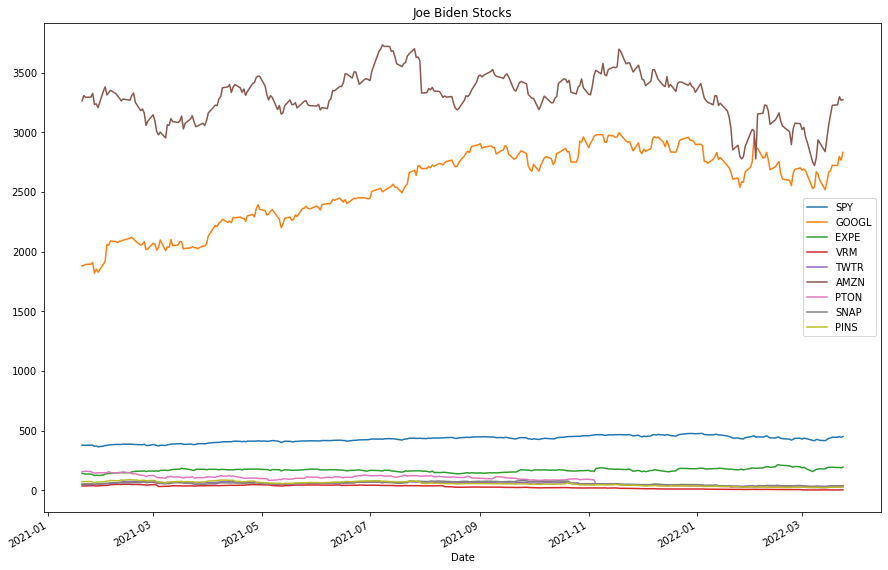

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Joe Biden Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

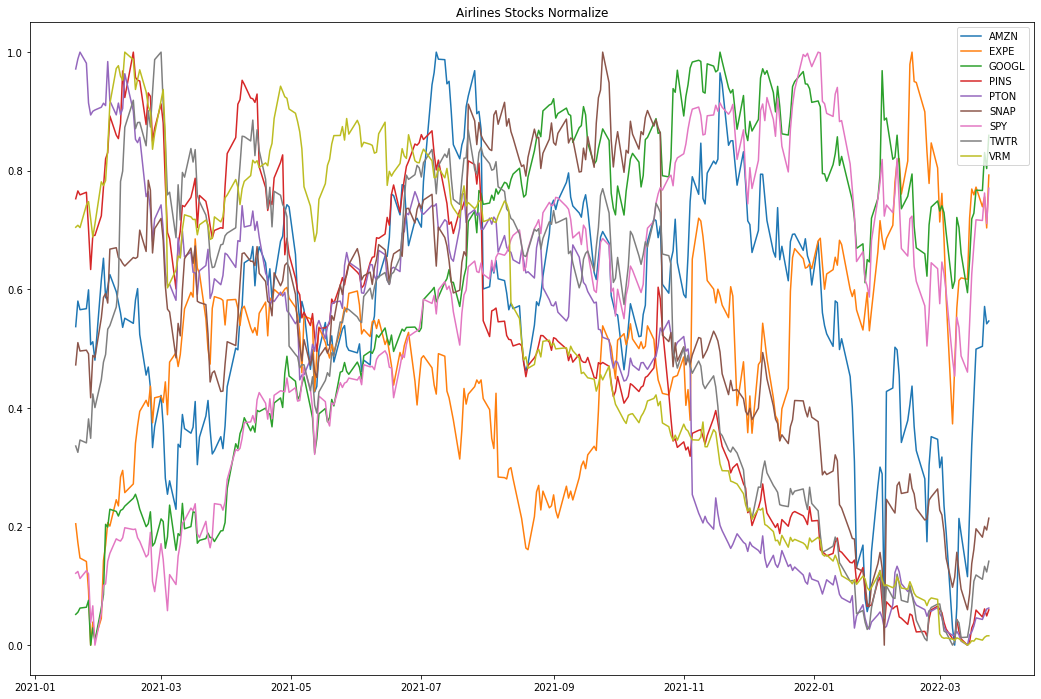

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Airlines Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

AMZN     2720.290039
EXPE      123.209999
GOOGL    1818.939941
PINS       22.370001
PTON       20.200001
SNAP       24.500000
SPY       364.070862
TWTR       32.419998
VRM         2.330000
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
GOOGL: 2996.77001953125
EXPE: 213.8000030517578
VRM: 50.93000030517578
TWTR: 77.62999725341797
AMZN: 3731.409912109375
PTON: 159.75
SNAP: 83.11000061035156
PINS: 89.1500015258789


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,GOOGL Return,EXPE Return,VRM Return,TWTR Return,AMZN Return,PTON Return,SNAP Return,PINS Return
Date,,,,,,,,,
2021-01-21,0.000912,0.002170,-0.020247,0.004374,-0.010084,0.013363,0.015020,0.042146,0.012114
2021-01-22,-0.003539,0.004464,-0.016993,-0.005172,0.019949,-0.004463,0.010245,-0.015257,-0.005985
2021-01-25,0.003944,0.000909,-0.003882,0.050342,-0.004578,0.000538,-0.016338,0.001493,0.003968
2021-01-26,-0.001561,0.007216,-0.033017,0.007554,0.038252,0.009754,-0.059501,-0.006710,-0.056290


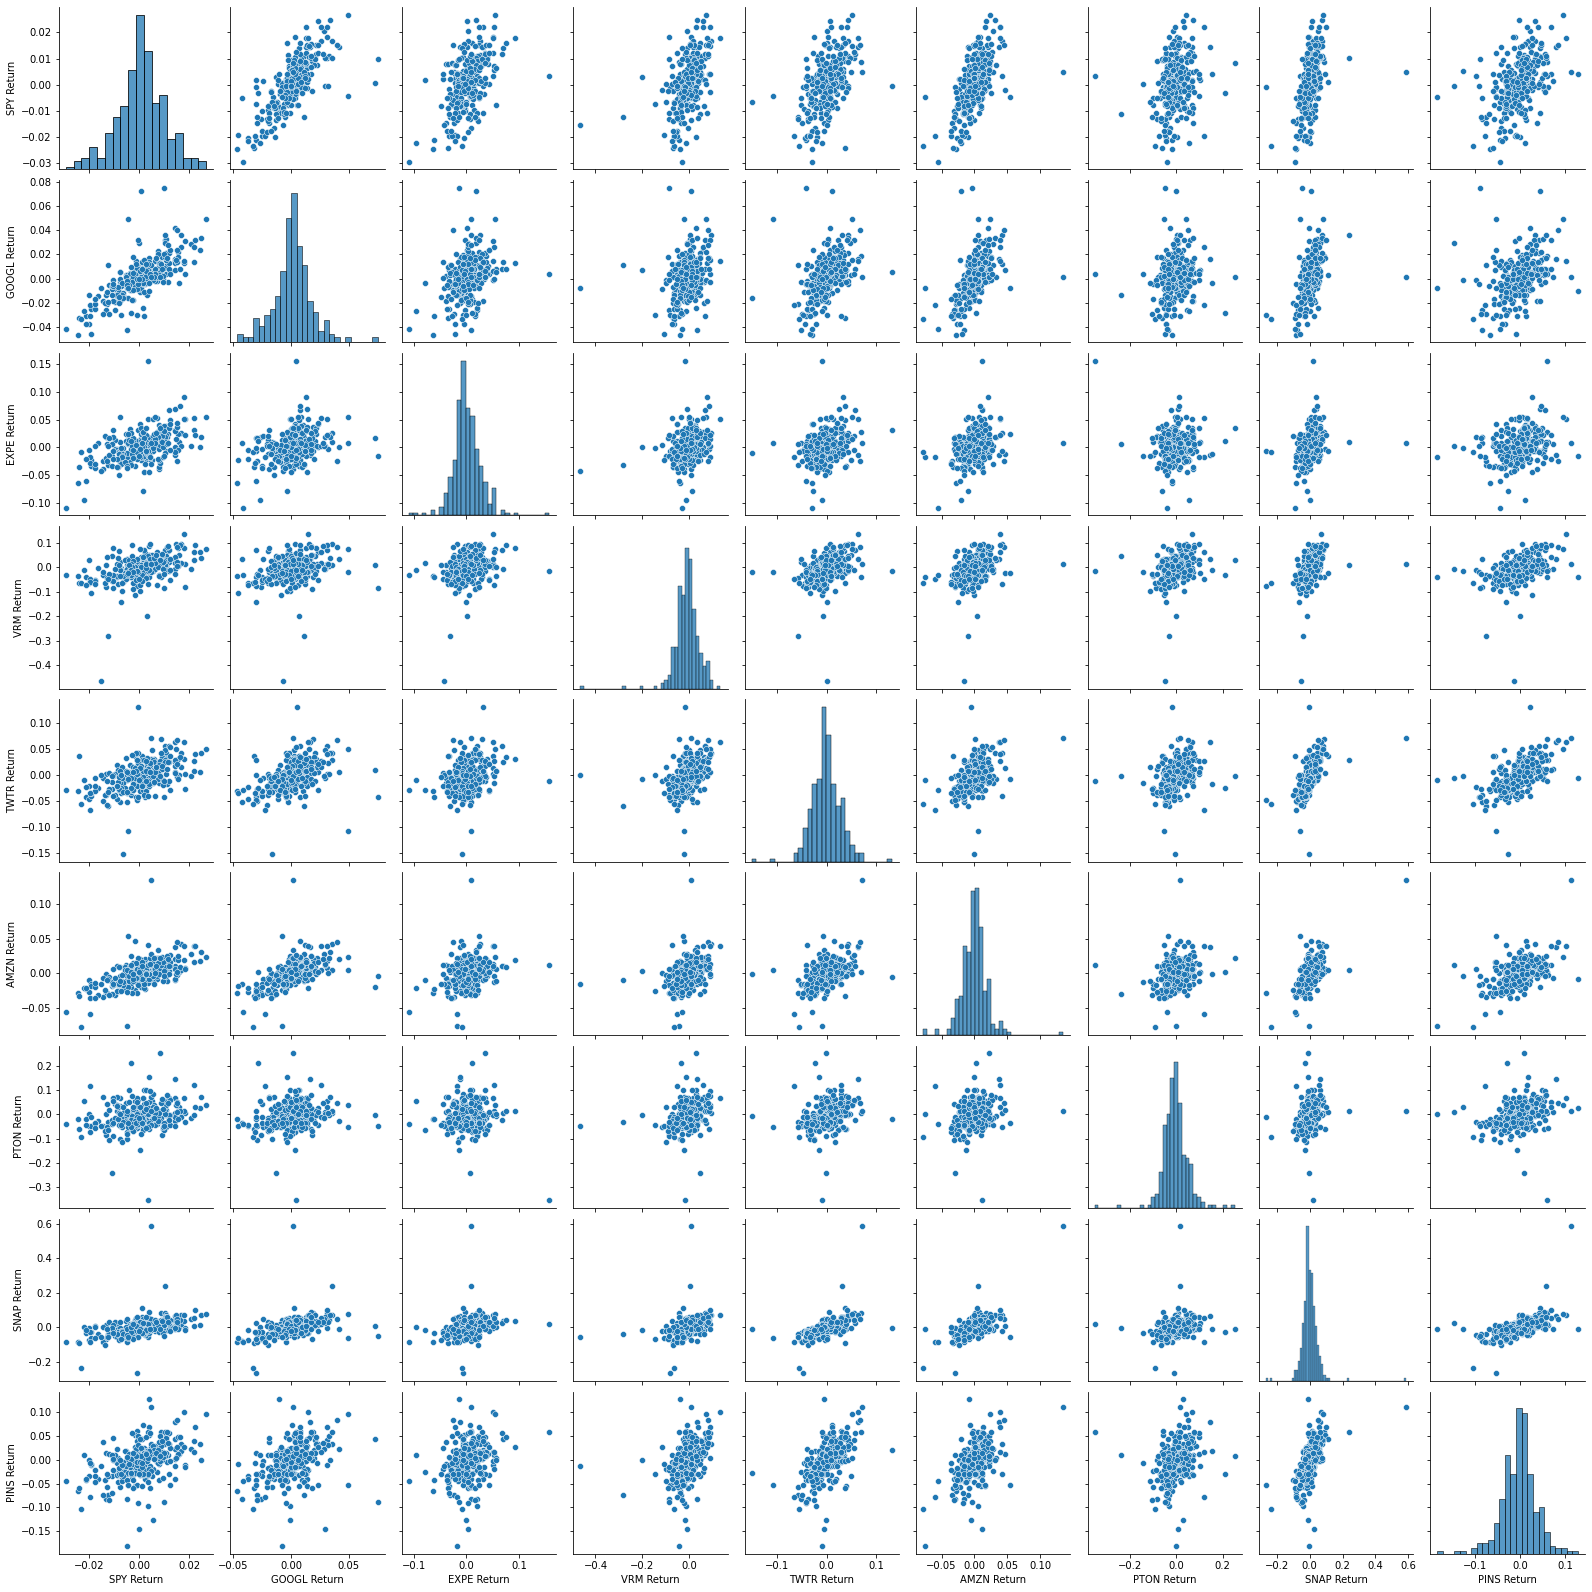

In [19]:
sns.pairplot(returns[1:] )

In [20]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return     2022-03-09
GOOGL Return   2022-02-02
EXPE Return    2021-11-05
VRM Return     2022-01-31
TWTR Return    2021-02-10
AMZN Return    2022-02-04
PTON Return    2022-02-08
SNAP Return    2022-02-04
PINS Return    2021-10-20
dtype: datetime64[ns]


In [21]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return     2022-03-07
GOOGL Return   2021-01-27
EXPE Return    2022-03-07
VRM Return     2022-03-01
TWTR Return    2021-04-30
AMZN Return    2022-02-03
PTON Return    2021-11-05
SNAP Return    2021-10-22
PINS Return    2021-07-30
dtype: datetime64[ns]


In [22]:
returns.corr()

,SPY Return,GOOGL Return,EXPE Return,VRM Return,TWTR Return,AMZN Return,PTON Return,SNAP Return,PINS Return
SPY Return,1.000000,0.738204,0.507466,0.449225,0.501243,0.612355,0.233982,0.433865,0.453909
GOOGL Return,0.738204,1.000000,0.348250,0.268347,0.413411,0.550745,0.124822,0.405569,0.366531
EXPE Return,0.507466,0.348250,1.000000,0.279967,0.297232,0.294549,-0.045660,0.285966,0.270972
VRM Return,0.449225,0.268347,0.279967,1.000000,0.382383,0.339673,0.299167,0.339213,0.407681
TWTR Return,0.501243,0.413411,0.297232,0.382383,1.000000,0.455966,0.285203,0.570364,0.562861
AMZN Return,0.612355,0.550745,0.294549,0.339673,0.455966,1.000000,0.245503,0.630388,0.533612
PTON Return,0.233982,0.124822,-0.045660,0.299167,0.285203,0.245503,1.000000,0.231799,0.281730
SNAP Return,0.433865,0.405569,0.285966,0.339213,0.570364,0.630388,0.231799,1.000000,0.566611
PINS Return,0.453909,0.366531,0.270972,0.407681,0.562861,0.533612,0.281730,0.566611,1.000000


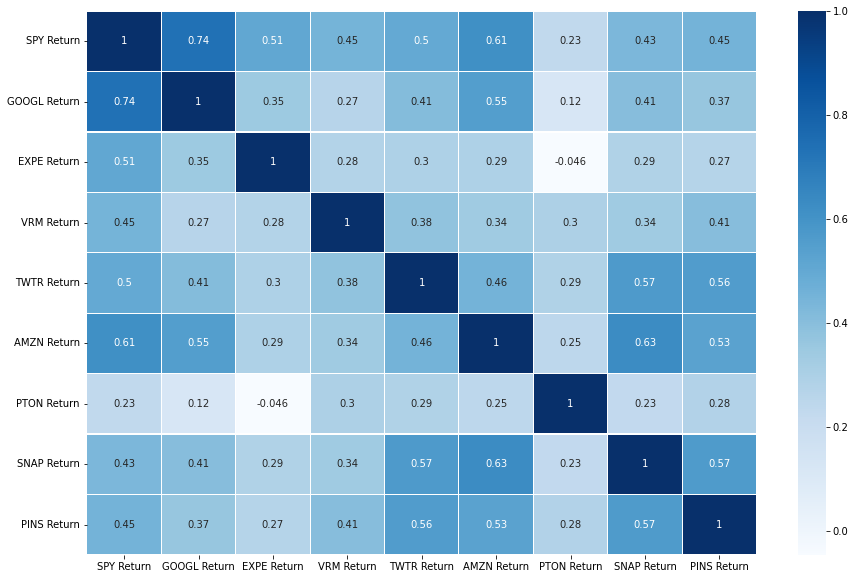

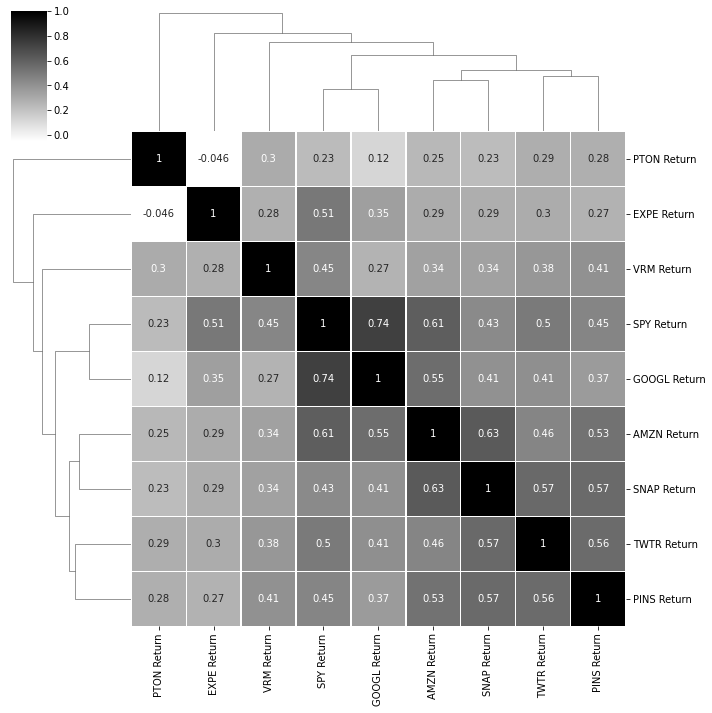

In [23]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

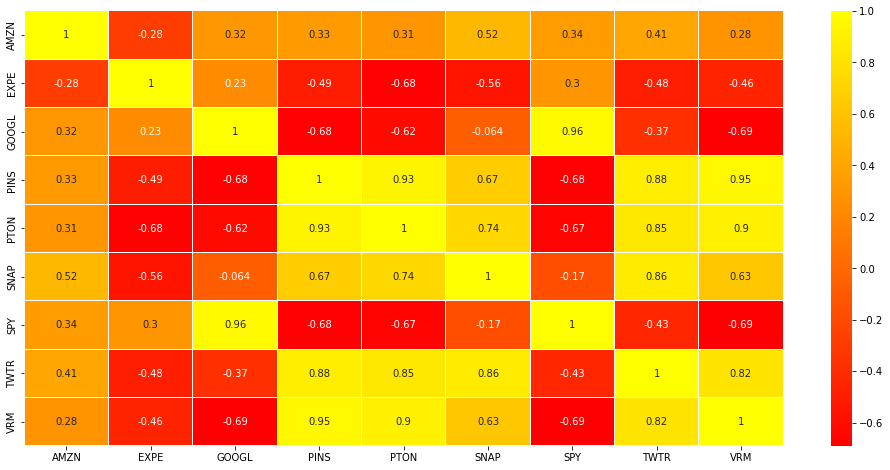

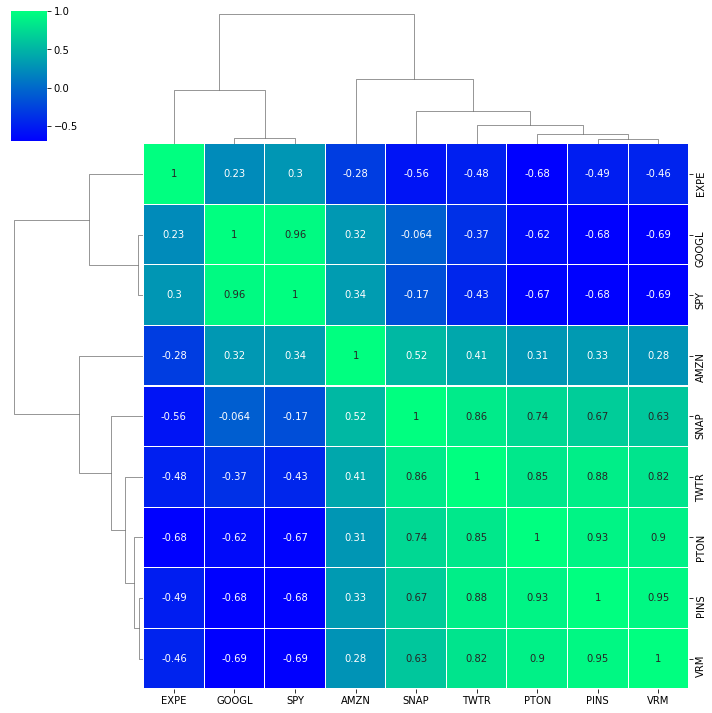

In [24]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [25]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [26]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [27]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.02444828 -0.03266606 -0.0198958  -0.05184721 -0.07312511 -0.0708696
                     -0.01153275 -0.03685581 -0.07450605]
95%                 [-0.03143384 -0.04233057 -0.02596649 -0.06579109 -0.09267928 -0.09103349
                     -0.01498327 -0.04722556 -0.09373915]
99%                 [-0.04453758 -0.06045959 -0.03735409 -0.09194749 -0.12935963 -0.1288576
                     -0.02145588 -0.06667748 -0.12981723]


In [28]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
AMZN: -0.0244
EXPE: -0.0327
GOOGL: -0.0199
PINS: -0.0518
PTON: -0.0731
SNAP: -0.0709
SPY: -0.0115
TWTR: -0.0369
VRM: -0.0745


In [29]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
AMZN: $2440.0
EXPE: $3270.0
GOOGL: $1990.0
PINS: $5180.0
PTON: $7310.0
SNAP: $7090.000000000001
SPY: $1150.0
TWTR: $3690.0
VRM: $7450.0


In [30]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
AMZN: $4450.0
EXPE: $6050.0
GOOGL: $3740.0000000000005
PINS: $9190.0
PTON: $12939.999999999998
SNAP: $12889.999999999998
SPY: $2150.0
TWTR: $6669.999999999999
VRM: $12980.0
